# Домашнее задание

В этом задании мы попрактикуемся в методах снижения размерности и кластеризации данных.

Мы будем работать с набором данных Samsung Human Activity Recognition. Данные поступают с акселерометров и гироскопов мобильных телефонов Samsung Galaxy S3, также известен вид активности человека с телефоном в кармане – ходил ли он, стоял, лежал, сидел или шел вверх/вниз по лестнице.

Представим, что вид активности нам неизвестнен, и попробуем кластеризовать людей чисто на основе имеющихся признаков.

In [1]:
import numpy as np
import seaborn as sns
from tqdm import tqdm_notebook

%matplotlib inline
from matplotlib import pyplot as plt
# plt.style.use(['seaborn-darkgrid'])
sns.set(style='darkgrid')
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'

from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

RANDOM_STATE = 17

In [2]:
!wget https://raw.githubusercontent.com/rsuh-python/mag2024ML/refs/heads/main/07-Clustering/samsung_test.txt

--2025-04-20 15:36:13--  https://raw.githubusercontent.com/rsuh-python/mag2024ML/refs/heads/main/07-Clustering/samsung_test.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26455219 (25M) [text/plain]
Saving to: ‘samsung_test.txt’

samsung_test.txt    100%[===================>]  25.23M  11.1MB/s    in 2.3s    

2025-04-20 15:36:18 (11.1 MB/s) - ‘samsung_test.txt’ saved [26455219/26455219]



In [3]:
!wget https://raw.githubusercontent.com/rsuh-python/mag2024ML/refs/heads/main/07-Clustering/samsung_test_labels.txt

--2025-04-20 15:36:35--  https://raw.githubusercontent.com/rsuh-python/mag2024ML/refs/heads/main/07-Clustering/samsung_test_labels.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5894 (5.8K) [text/plain]
Saving to: ‘samsung_test_labels.txt’

samsung_test_labels 100%[===================>]   5.76K  --.-KB/s    in 0s      

2025-04-20 15:36:36 (48.9 MB/s) - ‘samsung_test_labels.txt’ saved [5894/5894]



In [7]:
!wget https://raw.githubusercontent.com/rsuh-python/mag2024ML/refs/heads/main/07-Clustering/samsung_train.txt

--2025-04-20 15:39:21--  https://raw.githubusercontent.com/rsuh-python/mag2024ML/refs/heads/main/07-Clustering/samsung_train.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 65998904 (63M) [text/plain]
Saving to: ‘samsung_train.txt’

samsung_train.txt   100%[===================>]  62.94M  56.5MB/s    in 1.1s    

2025-04-20 15:39:28 (56.5 MB/s) - ‘samsung_train.txt’ saved [65998904/65998904]



In [8]:
!wget https://raw.githubusercontent.com/rsuh-python/mag2024ML/refs/heads/main/07-Clustering/samsung_train_labels.txt

--2025-04-20 15:39:40--  https://raw.githubusercontent.com/rsuh-python/mag2024ML/refs/heads/main/07-Clustering/samsung_train_labels.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14704 (14K) [text/plain]
Saving to: ‘samsung_train_labels.txt’

samsung_train_label 100%[===================>]  14.36K  --.-KB/s    in 0.004s  

2025-04-20 15:39:42 (3.37 MB/s) - ‘samsung_train_labels.txt’ saved [14704/14704]



In [2]:
X_train = np.loadtxt("samsung_train.txt")
y_train = np.loadtxt("samsung_train_labels.txt").astype(int)

X_test = np.loadtxt("samsung_test.txt")
y_test = np.loadtxt("samsung_test_labels.txt").astype(int)

Для кластеризации нам не нужен вектор ответов. Объедините обучающую и тестовую выборки.

In [3]:
#your code here
X = np.vstack([X_train, X_test])
y = np.hstack([y_train, y_test])

In [4]:
np.unique(y)

array([1, 2, 3, 4, 5, 6])

Эти метки соответствуют:

1 - ходьбе,
2 - подъему вверх по лестнице,
3 - спуску по лестнице,
4 - сидению,
5 - стоянию,
6 - лежанию

Отмасштабируйте выборку с помощью StandardScaler.

In [5]:
#your code here
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Понижаем размерность с помощью PCA, оставляя столько компонент, сколько нужно для того, чтобы объяснить как минимум 90% дисперсии исходных (отмасштабированных) данных. Используйте отмасштабированную выборку и зафиксируйте random_state.

In [6]:
#your code here
pca = PCA(n_components=0.90, random_state=RANDOM_STATE) # из доки при 0 < n_components < 1 будет выбрано количество компонент, которое будет объяснять % дисперсии.
X_pca = pca.fit_transform(X_scaled)

pca.n_components_

np.int64(65)

Визуализируйте данные в проекции на первые две главные компоненты.

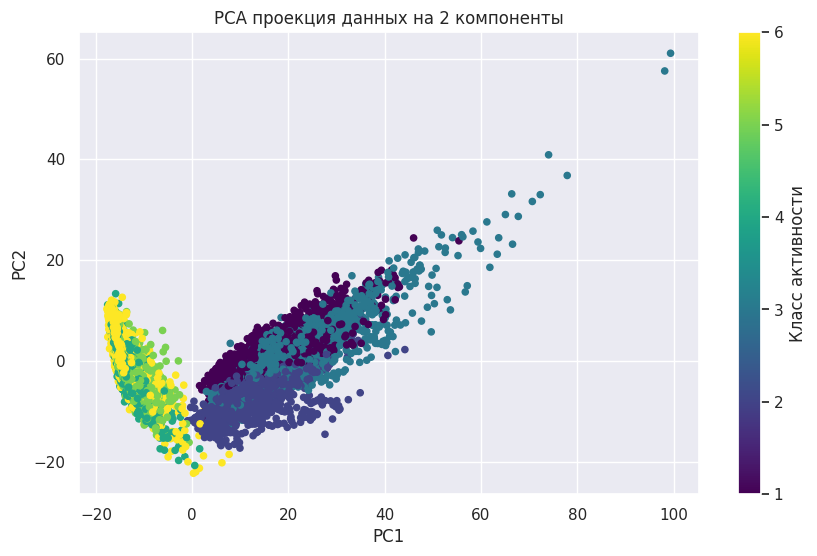

In [7]:
#your code here
pca_2d = PCA(n_components=2, random_state=42)
X_2d = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y, s=20, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA проекция данных на 2 компоненты')
plt.colorbar(label='Класс активности')
plt.show()

Сделайте кластеризацию данных методом KMeans, обучив модель на данных со сниженной за счет PCA размерностью. В данном случае нужно искать 6 кластеров (так как у нас 6 классов).

Параметры:

n_clusters = n_classes (число уникальных меток целевого класса)

n_init = 100

random_state = RANDOM_STATE (для воспроизводимости результата)

In [8]:
n_classes = np.unique(y).shape[0]

kmeans = KMeans(
    n_clusters=n_classes,
    n_init=100,
    random_state=RANDOM_STATE
)

kmeans_labels = kmeans.fit_predict(X_pca)

Визуализируйте данные в проекции на первые две главные компоненты. Раскрасьте точки в соответствии с полученными метками кластеров.

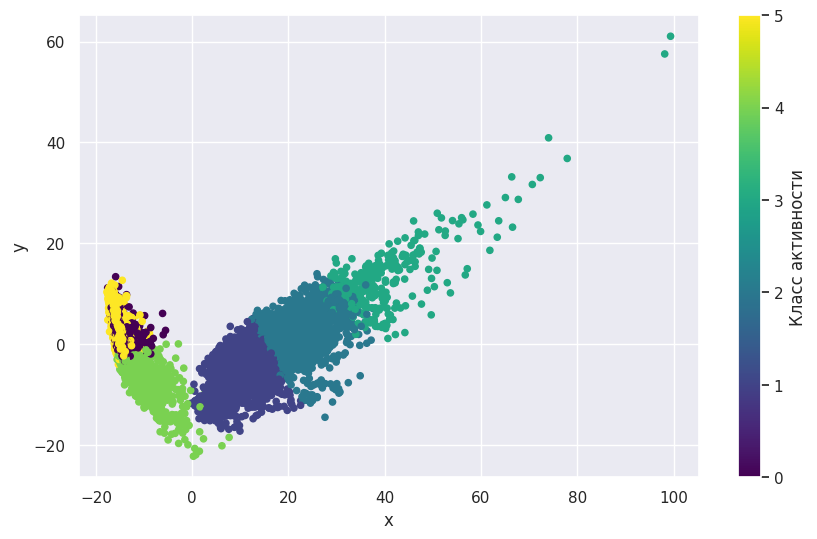

In [9]:
plt.figure(figsize=(10, 6))

plt.scatter(X_2d[:, 0], X_2d[:, 1], c=kmeans_labels, s=20, cmap='viridis')

# plt.title('Кластеризация на данных, уменьшенных с помощью PCA.')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label='Класс активности')
plt.show()

Выведите на экран значения метрик качества кластеризации

In [10]:
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score

y_all = np.concatenate([y_train, y_test])

# Гомогенность и полнота принимают значения из отрезка [0; 1]. Большие значения соответствуют более точной кластеризации.
print(homogeneity_score(y_all, kmeans.labels_))
print(completeness_score(y_all, kmeans.labels_))
print(v_measure_score(y_all, kmeans.labels_))

0.5407578116461379
0.5811579770457963
0.5602304897667773


Теперь попробуем сделать кластеризацию с помощью AgglomerativeClustering (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

In [11]:
ag = AgglomerativeClustering(n_clusters=n_classes,
                             linkage='ward').fit(X_pca)

In [12]:
y_ag = ag.labels_

Выведите метрики качества для полученного разбиения на кластеры. Сравните с kmeans. Запишите выводы!

In [13]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score

print(homogeneity_score(y_all, y_ag))
print(completeness_score(y_all, y_ag))
print(v_measure_score(y_all, y_ag))

print(adjusted_rand_score(y_all, y_ag))
print(normalized_mutual_info_score(y_all, y_ag))

0.5779071626156045
0.6728743591901729
0.6217855076000528
0.49362763373004886
0.6217855076000529


Гомогенность у агломеративной кластеризации выше, что значит в кластере больше попало точек, принадлежащих одному классу. Или другими словами кластеры более «чистые», меньше смешения классов.Полнота также выше, чем у k-means, что значит боьлше объектов одного класса относятся к одному кластеру, или они менее «размазаны» по разным кластерам. Ну и баланс выше у AgglomerativeClustering

Попробуйте применить другие методы кластеризации из sklearn. Также вычислите метрики качества и сделайте вывод о том, какой метод сработал лучше.

In [18]:
from sklearn.cluster import DBSCAN #(!)

# DBSCAN кластеризация
dbscan = DBSCAN(eps=0.1, min_samples=5)
y_dbscan = dbscan.fit_predict(X_pca)

print(adjusted_rand_score(y_all, y_dbscan))
print(normalized_mutual_info_score(y_all, y_dbscan))

0.0
0.0


In [16]:
from sklearn.cluster import SpectralClustering

# Cпектральная кластеризация
spectral = SpectralClustering(
    n_clusters=n_classes,
    affinity='nearest_neighbors',
    n_neighbors=10,
    random_state=RANDOM_STATE
)
y_spectral = spectral.fit_predict(X_pca)


print(adjusted_rand_score(y_all, y_spectral))
print(normalized_mutual_info_score(y_all, y_spectral))

0.4926159685546872
0.6732120058688196


In [17]:
print(homogeneity_score(y_all, y_spectral))
print(completeness_score(y_all, y_spectral))
print(v_measure_score(y_all, y_spectral))

0.575696662266079
0.8104998870710706
0.6732120058688196


Для самой успешной из полученных кластеризаций попробуйте дать интерпретацию кластеров. Опишите характеристики объектов, попавших в каждый кластер. Для этого можете ответить на следующие вопросы:

* похожи ли объекты внутри каждого кластера на определенный тип активности человека?
* в каких кластерах смешано несколько типов активности? С чем, на ваш взгляд, это может быть связано?
* качественная ли получилась кластеризация? На основании чего вы можете сделать такой вывод?

In [20]:
import pandas as pd

df_clusters = pd.DataFrame({
    'Cluster': y_spectral,
    'Activity': y_all
})

cluster_summary = df_clusters.groupby(['Cluster', 'Activity']).size().unstack(fill_value=0)
cluster_summary

Activity,1,2,3,4,5,6
Cluster,,,,,,
0,0,0,0,1760,1906,114
1,1521,1119,1387,0,0,1
2,0,0,0,15,0,1828
3,0,54,0,0,0,0
4,62,371,2,2,0,1
5,139,0,17,0,0,0


SpectralClustering имеет лучшие результаты по полноте и V-меру, что делает его лучшим методом в плане общей производительности.

AgglomerativeClustering дал лучше результат по гомогенности.

KMeans дал более низкие результаты по всем метрикам.

По фрейму:

Из примечательного в кластер 0 попали сидение и стояние, что составляет основную часть этого кластера и похоже на сотрудников в офисе или в общественном месте.

А в кластер 2, например, больше активности лежание, люди либо отдыхают либо отдыхают вообще везде и всегда (:

Кластер 3 выглядит, что неудачно кластеризован. В кластер 1 попали динамичные ребята.

В целом кластеризация неплохо выглядит, потому что разделила различные типы активности.